<a href="https://colab.research.google.com/github/farhan1503001/Deep-Learning-Rhyme-Projects/blob/main/Tweet_Emotion_Recognition_Using_LSTM_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

     |████████████████████████████████| 1.7MB 8.9MB/s 
     |████████████████████████████████| 245kB 51.1MB/s 


In [194]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('mae'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_mae'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.4.1


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [151]:
dataset=nlp.load_dataset(path='emotion')

Using custom data configuration default


In [152]:
dataset.keys()

dict_keys(['train', 'validation', 'test'])

In [153]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [154]:
train_dataset=dataset['train']
test_dataset=dataset['test']
validation_dataset=dataset['validation']

In [155]:
train_dataset[0]['text'],train_dataset[0]['label']

('i didnt feel humiliated', 'sadness')

In [156]:
def dataset_divider(tweetset):
  text=[text['text'] for text in tweetset]
  label=[label['label'] for label in tweetset ]

  return text,label



In [159]:
train_text,train_label=dataset_divider(train_dataset)

In [160]:
train_text[0],train_label[0]

('i didnt feel humiliated', 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [161]:
#Now we need to tokenize the dataset and set them to numbers for training 
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(train_text)


In [162]:
tokenizer.texts_to_sequences([train_text[0]])


[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

(array([2641., 3795., 3968., 2306., 1499.,  963.,  453.,  251.,  106.,
          18.]),
 array([ 2. ,  8.4, 14.8, 21.2, 27.6, 34. , 40.4, 46.8, 53.2, 59.6, 66. ]),
 <a list of 10 Patch objects>)

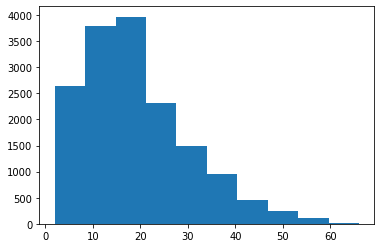

In [164]:
#Now at first we will try to find out the lengths of tweets and then plot them 
max_len=50
lengths=[len(x.split(' ')) for x in train_text]

plt.hist(x=lengths)


In [165]:
#Here 60 is considered the highest length of a tweet now padding is done to make all of them same size
def padding_data(data):
  sequence=tokenizer.texts_to_sequences(data)
  padded_text=tf.keras.preprocessing.sequence.pad_sequences(sequence,maxlen=50,padding='post',truncating='post',)
  return padded_text

In [166]:
#Now padding for whole dataset
padded_train_text=padding_data(train_text)

In [167]:
padded_train_text[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [168]:
x_train=padded_train_text

In [169]:
x_train[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [170]:
class_sets=set(train_label)
class_sets

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

(array([4666.,    0., 2159.,    0., 1304.,    0.,  572.,    0., 1937.,
           0., 5362.]),
 array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
        2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
        4.54545455, 5.        ]),
 <a list of 11 Patch objects>)

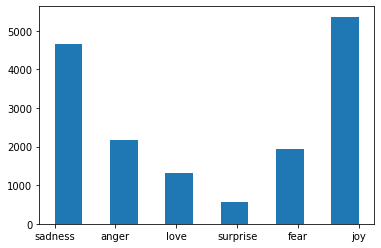

In [171]:
plt.hist(train_label,bins=11)

In [172]:
#Labelize the label set
class_to_index=dict((c,i) for i,c in enumerate(class_sets))
index_to_class=dict((v,j) for j,v in class_to_index.items())

In [173]:
class_to_index

{'anger': 3, 'fear': 2, 'joy': 4, 'love': 5, 'sadness': 0, 'surprise': 1}

In [174]:
index_to_class

{0: 'sadness', 1: 'surprise', 2: 'fear', 3: 'anger', 4: 'joy', 5: 'love'}

In [175]:
name_to_ids=lambda labels: np.array([class_to_index.get(x) for x in labels])

In [176]:
y_train=name_to_ids(train_label)

In [177]:
y_train[1:10]

array([0, 3, 5, 3, 0, 1, 2, 4, 5])

In [178]:
#Preparing also validation 
val_pre_text,val_pre_label=dataset_divider(validation_dataset)
#tokenizer.fit_on_texts(val_pre_text)
x_val=padding_data(val_pre_text)
y_val=name_to_ids(val_pre_label)
x_val[0],y_val[0]
val_pre_label[0]

'sadness'

In [179]:
test_pre_text,test_pre_label=dataset_divider(test_dataset)
#tokenizer.fit_on_texts(test_pre_text)
x_test=padding_data(test_pre_text)
y_test=name_to_ids(test_pre_label)
x_test[0],y_test[0]
test_pre_text[0]

'im feeling rather rotten so im not very ambitious right now'

In [180]:
test_pre_text[1]

'im updating my blog because i feel shitty'

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [202]:
model=tf.keras.models.Sequential(
    [
     tf.keras.layers.Embedding(10000,128,input_length=50),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=20,return_sequences=True)),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=20)),
     tf.keras.layers.Dense(units=6,activation='softmax')
    ]
)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy','mae'])

In [203]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 50, 128)           1280000   
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 50, 40)            23840     
_________________________________________________________________
bidirectional_25 (Bidirectio (None, 40)                9760      
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 246       
Total params: 1,313,846
Trainable params: 1,313,846
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [204]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5',  monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [205]:
history=model.fit(x=x_train,y=y_train,validation_data=(x_val,y_val),epochs=30,verbose=1,
          callbacks=[checkpointer])

Epoch 1/30
500/500 [==============================] - 18s 28ms/step - loss: 1.4073 - accuracy: 0.4407 - mae: 2.3784 - val_loss: 0.5442 - val_accuracy: 0.8245 - val_mae: 2.4430

Epoch 00001: val_accuracy improved from -inf to 0.82450, saving model to /tmp/weights.hdf5
Epoch 2/30
500/500 [==============================] - 12s 24ms/step - loss: 0.3727 - accuracy: 0.8758 - mae: 2.3650 - val_loss: 0.3312 - val_accuracy: 0.8835 - val_mae: 2.4430

Epoch 00002: val_accuracy improved from 0.82450 to 0.88350, saving model to /tmp/weights.hdf5
Epoch 3/30
500/500 [==============================] - 12s 23ms/step - loss: 0.1741 - accuracy: 0.9400 - mae: 2.3684 - val_loss: 0.2822 - val_accuracy: 0.8960 - val_mae: 2.4430

Epoch 00003: val_accuracy improved from 0.88350 to 0.89600, saving model to /tmp/weights.hdf5
Epoch 4/30
500/500 [==============================] - 11s 23ms/step - loss: 0.1002 - accuracy: 0.9676 - mae: 2.3312 - val_loss: 0.2937 - val_accuracy: 0.9100 - val_mae: 2.4430

Epoch 00004: 

In [206]:
model.load_weights('/tmp/weights.hdf5')

In [207]:
result=model.evaluate(x=x_test,y=y_test)

63/63 [==============================] - 0s 6ms/step - loss: 0.3653 - accuracy: 0.9060 - mae: 2.3872


In [208]:
predictions=model.predict_classes(x_test,verbose=1,batch_size=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


2000/2000 [==============================] - 10s 5ms/step


In [209]:
predictions

array([0, 0, 0, ..., 0, 4, 2])

In [210]:
y_test

array([0, 0, 0, ..., 4, 4, 2])

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

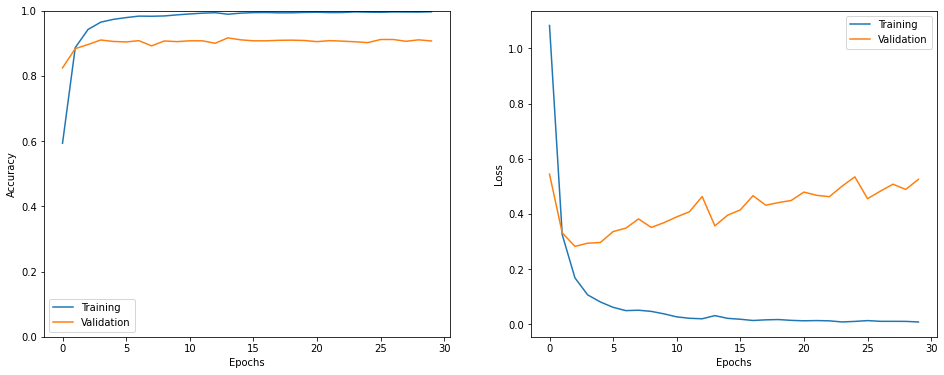

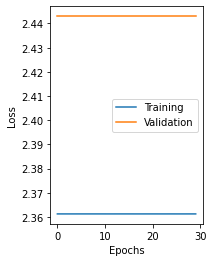

In [211]:
show_history(history)

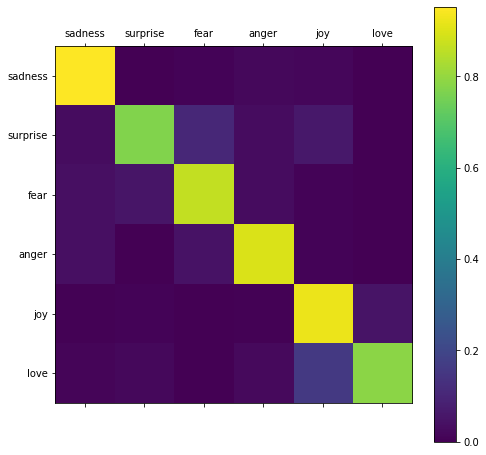

In [213]:
show_confusion_matrix(y_test,predictions,classes=class_sets)

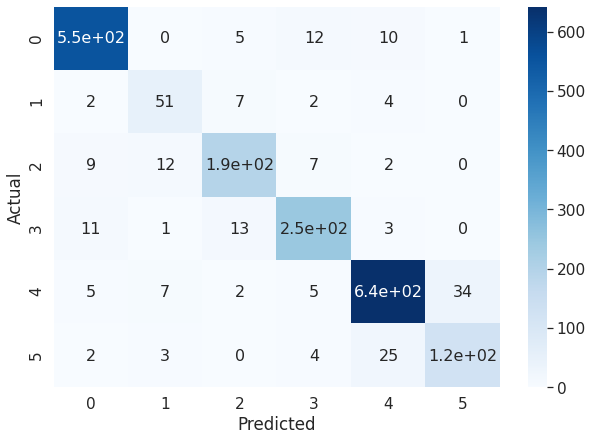

In [216]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

In [217]:
! pip install -q scikit-plot

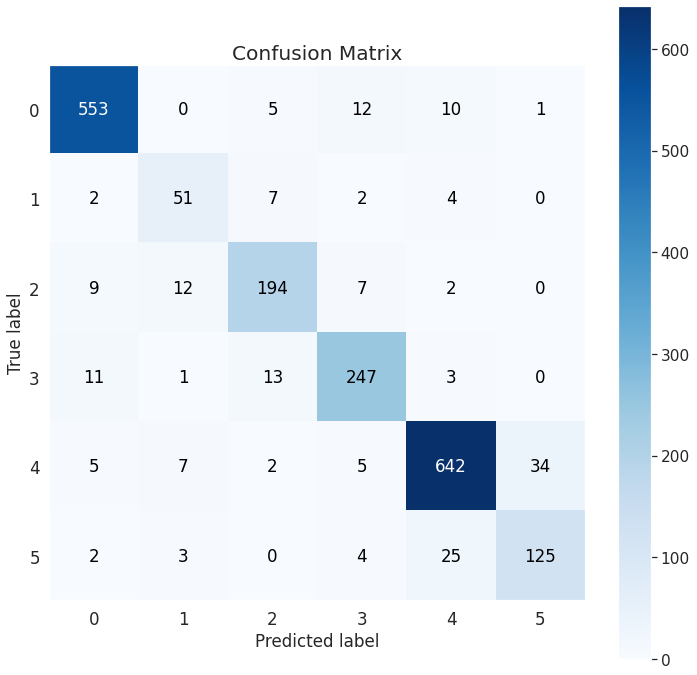

In [218]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    predictions,
    figsize=(12,12))

In [240]:
predict_prob=model.predict(x_test)
predict_prob[2]

array([9.9948502e-01, 6.1215069e-06, 7.7741446e-05, 8.8258006e-05,
       3.1413065e-04, 2.8769933e-05], dtype=float32)

In [241]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc,roc_curve
import matplotlib.pyplot as plt

In [242]:
lb=label_binarize(y_test,classes=[0,1,2,3,4,5])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
  fpr[i], tpr[i], _ = roc_curve(lb[:, i], predict_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
    

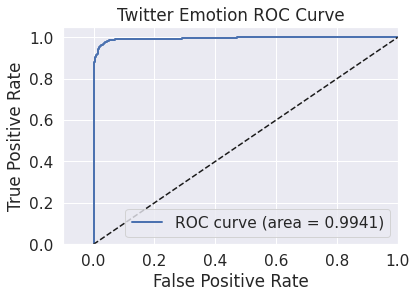

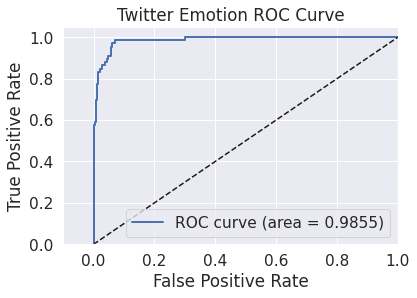

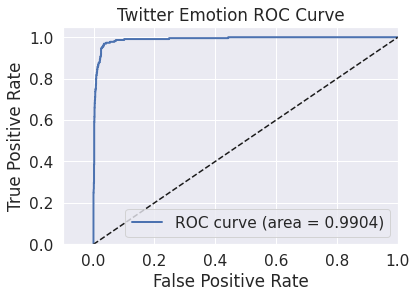

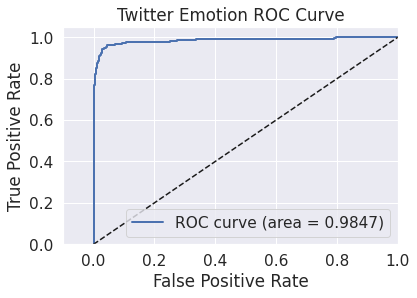

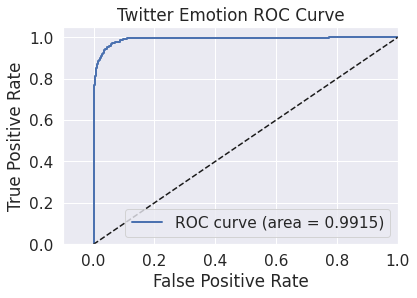

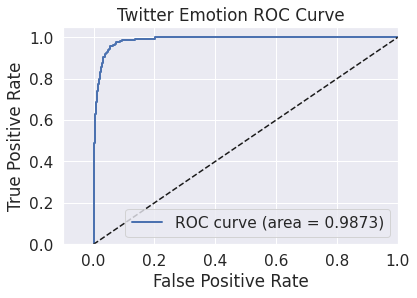

In [243]:
for i in range(6):
      plt.figure()
      plt.plot(fpr[i], tpr[i], lw=2,label='ROC curve (area = %0.4f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([-0.1, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Twitter Emotion ROC Curve')
      plt.legend(loc="lower right")
      plt.show()

In [246]:
from sklearn.metrics import precision_recall_curve,f1_score,auc

In [249]:
precision = dict()
recall = dict()
thresholds=dict()
prec_auc = dict()
for i in range(6):
  precision[i],recall[i],thresholds = precision_recall_curve(lb[:, i], predict_prob[:, i])
  prec_auc[i] = auc(fpr[i], tpr[i])

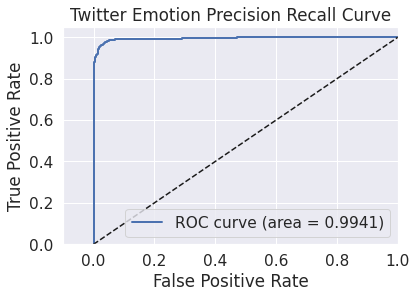

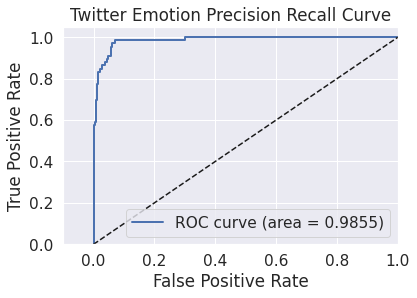

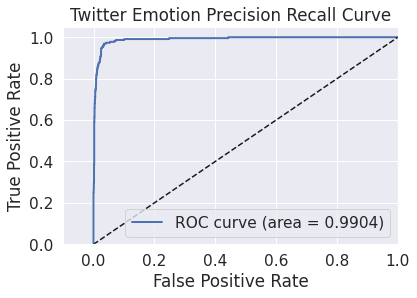

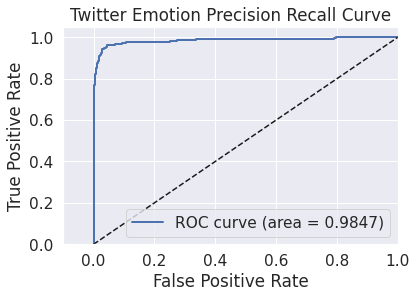

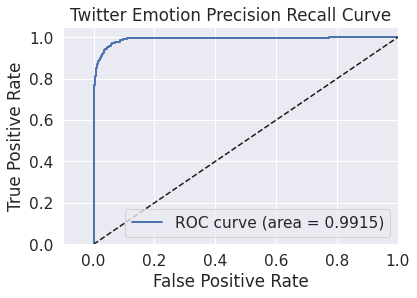

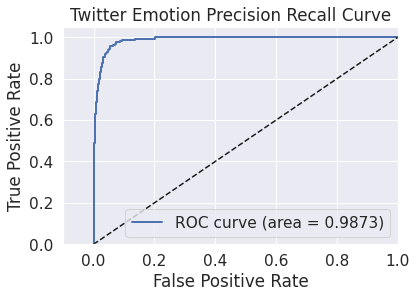

In [251]:
for i in range(6):
      plt.figure()
      plt.plot(fpr[i], tpr[i], lw=2,label='ROC curve (area = %0.4f)' % prec_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([-0.1, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Twitter Emotion Precision Recall Curve')
      plt.legend(loc="lower right")
      plt.show()